In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
features = np.array([[-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,1],
                    [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1],
                    [1,1,1,1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,1,-1, 1,1,1,1,1,-1,-1],
                    [1, 1,  1,  1,  1,  1,  1, -1, 1, -1, -1, -1, -1,  1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1,  1,  1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1,  1, 1, 1,  1,  1,  1,  1,  1],
                    [-1,-1,-1,1,1,1,1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1],
                    [-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1],
                    [1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                    [1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                    [1,1,1,1,1,1,1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,1,1],
                    [-1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1],
                    [-1,-1,-1,1,-1,-1,-1, -1,-1,-1,1,-1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,1,1,1,1,-1, 1,-1,-1,-1,-1,-1,1, 1,-1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,1,1],
                     [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                     [-1,-1,1,1,1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                      [1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],
                     [-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,-1,-1,1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1]
                    ,[-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,1],
                    [-1,1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1],
                    [1,1,1,1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,1, -1,1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,-1,-1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,1,-1, 1,1,1,1,1,-1,-1],
                    [1, 1,  1,  1,  1,  1,  1, -1, 1, -1, -1, -1, -1,  1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1,  -1, -1, -1, -1, -1, 1,  1,  1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1,  1, 1, 1,  1,  1,  1,  1,  1],
                    [-1,-1,-1,1,1,1,1, -1,-1,-1,-1,-1,-1,-1, -1,-1,-1,-1,-1,1,1, -1,-1,-1,-1,-1,1,1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1],
                    [-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1],
                    [1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                    [1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                    [1,1,1,1,1,1,1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,1, -1,-1,-1,1,-1,-1,-1, 1,1,1,1,1,1,1],
                    [-1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1],
                    [-1,-1,-1,1,-1,-1,-1, -1,-1,-1,1,-1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,1,1,1,1,-1, 1,-1,-1,-1,-1,-1,1, -1,-1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,1,1],
                     [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                     [-1,-1,1,1,1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                      [1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],
                     [-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,-1,-1,1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1]])
labels = np.array([0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6])

In [3]:
features = np.reshape(features, (42, 9, 7))

In [4]:
#features = features/255

In [5]:
labels = keras.utils.to_categorical(labels,7)

In [6]:
num_classes = 7
input_shape = (9,7,1)

In [7]:
#features  = np.expand_dims(features, -1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.3)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 5, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 3, 64)          18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 1, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                        

In [10]:
model.compile(loss="categorical_crossentropy",optimizer = keras.optimizers.Adam(learning_rate = 0.1), metrics=["accuracy"])

r = model.fit(x_train,y_train, batch_size=16, epochs=50, validation_data = (x_test, y_test))

Epoch 1/50
2/2 [==============================] - 1s 314ms/step - loss: 7.6201 - accuracy: 0.1379 - val_loss: 6.8801 - val_accuracy: 0.0769
Epoch 2/50
2/2 [==============================] - 0s 69ms/step - loss: 4.3328 - accuracy: 0.3793 - val_loss: 2.2964 - val_accuracy: 0.1538
Epoch 3/50
2/2 [==============================] - 0s 60ms/step - loss: 1.7972 - accuracy: 0.3448 - val_loss: 1.4248 - val_accuracy: 0.4615
Epoch 4/50
2/2 [==============================] - 0s 63ms/step - loss: 1.1738 - accuracy: 0.4828 - val_loss: 1.2386 - val_accuracy: 0.5385
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 1.1637 - accuracy: 0.7241 - val_loss: 1.1465 - val_accuracy: 0.6154
Epoch 6/50
2/2 [==============================] - 0s 65ms/step - loss: 0.9536 - accuracy: 0.6552 - val_loss: 0.7983 - val_accuracy: 0.6154
Epoch 7/50
2/2 [==============================] - 0s 59ms/step - loss: 0.3216 - accuracy: 0.8966 - val_loss: 0.8332 - val_accuracy: 0.6923
Epoch 8/50
2/2 [==========

In [11]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

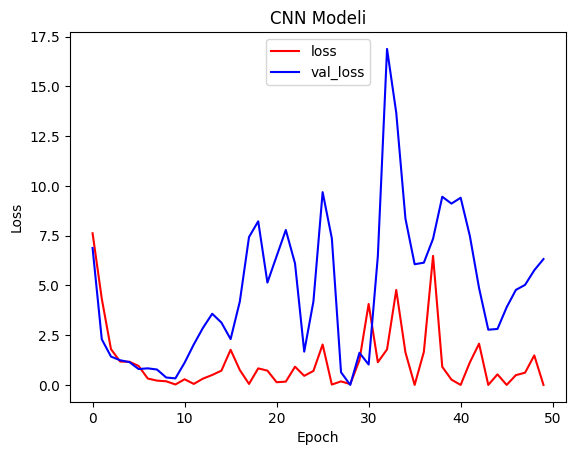

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('CNN Modeli')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(r.history['loss'],'r-', label = 'loss')
plt.plot(r.history['val_loss'],'b-', label = 'val_loss')
leg = plt.legend(loc='upper center')

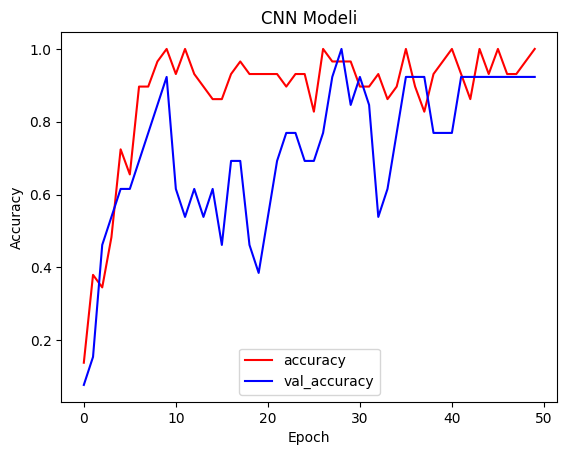

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('CNN Modeli')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(r.history['accuracy'],'r-', label = 'accuracy')
plt.plot(r.history['val_accuracy'], 'b-',label = 'val_accuracy')
leg = plt.legend(loc='lower center')

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
x_test = np.expand_dims(x_test, -1)

In [19]:
y_prediction = model.predict(x_test)

1/1 [==============================] - 0s 37ms/step


In [20]:
y_prediction = np.argmax(y_prediction, axis = 1)

In [21]:
y_prediction.shape

(13,)

In [22]:
y_prediction

array([4, 2, 0, 0, 2, 5, 3, 4, 0, 3, 1, 0, 1], dtype=int64)

In [23]:
y_test = np.argmax(y_test, axis=-1) 

In [24]:
y_test

array([4, 2, 0, 0, 2, 5, 3, 1, 0, 3, 1, 0, 1], dtype=int64)

In [25]:
y_prediction

array([4, 2, 0, 0, 2, 5, 3, 4, 0, 3, 1, 0, 1], dtype=int64)

In [26]:
result = confusion_matrix(y_test, y_prediction)
print(result)

[[4 0 0 0 0 0]
 [0 2 0 0 1 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


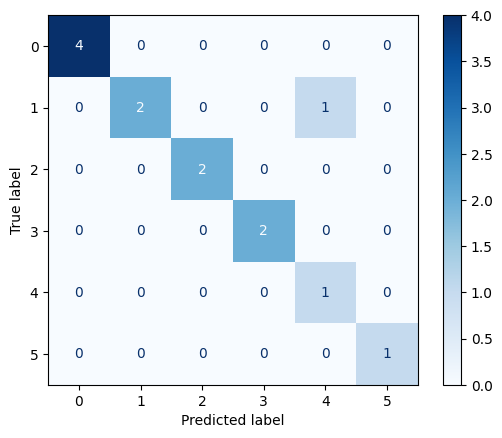

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels = ["a", "b", "c", "d", "e", "j", "k"]
#, display_labels=labels
disp = ConfusionMatrixDisplay(confusion_matrix=result)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
recall = recall_score(y_test, y_prediction,average='macro')
print('Recall: %f' % recall)

Recall: 0.944444


In [30]:
f1 = f1_score(y_test, y_prediction,average='macro')
print('F1 score: %f' % f1)

F1 score: 0.911111


In [31]:
precision = precision_score(y_test, y_prediction,average='macro')
print('Precision : %f' % precision)

Precision : 0.916667


In [32]:
accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy: %f' % accuracy)

Accuracy: 0.923077


In [49]:
y_prediction

array([4, 2, 0, 0, 2, 5, 3, 4, 0, 3, 1, 0, 1], dtype=int64)

In [50]:
y_test

array([4, 2, 0, 0, 2, 5, 3, 1, 0, 3, 1, 0, 1], dtype=int64)

C:\Users\büşrasalihoğlu\Desktop\notebookvenv\venv\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

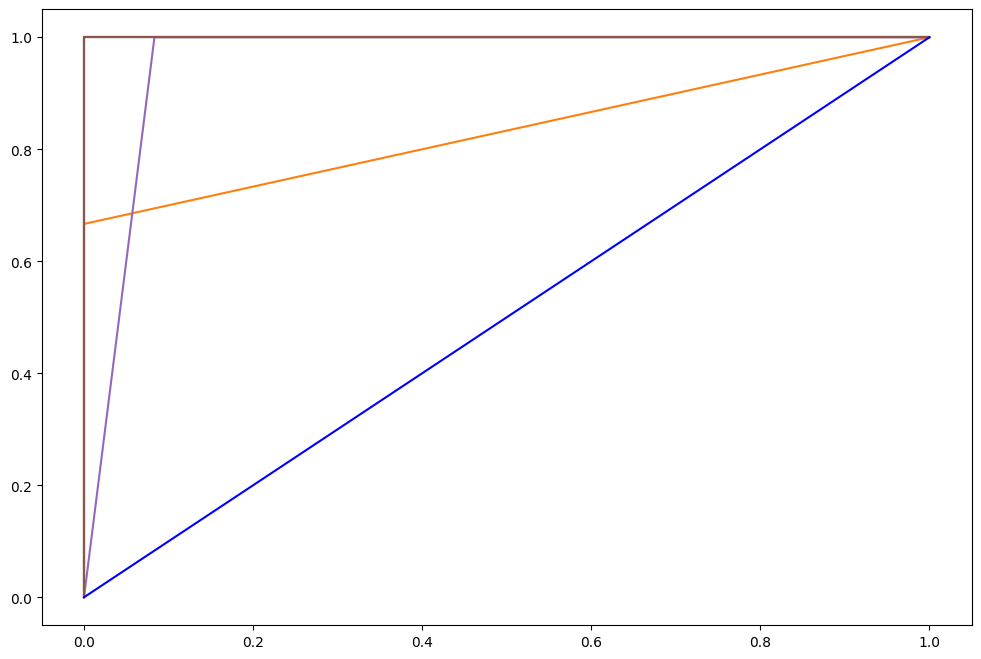

In [36]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["a", "b", "c", "d", "e", "j", "k"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    y_test = tf.keras.utils.to_categorical(y_test,7)
    y_pred = tf.keras.utils.to_categorical(y_pred,7)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_prediction))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [52]:
y_test.shape

(13,)

In [54]:
y_prediction.shape

(13,)

In [55]:
y_test = np.reshape(y_test, (13,1))
y_prediction = np.reshape(y_prediction, (13,1))

In [60]:
y_prediction = keras.utils.to_categorical(y_prediction,7)
y_test = keras.utils.to_categorical(y_test,7)